Food for thought https://towardsdatascience.com/predicting-housing-prices-using-advanced-regression-techniques-8dba539f9abe

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import Normalizer
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

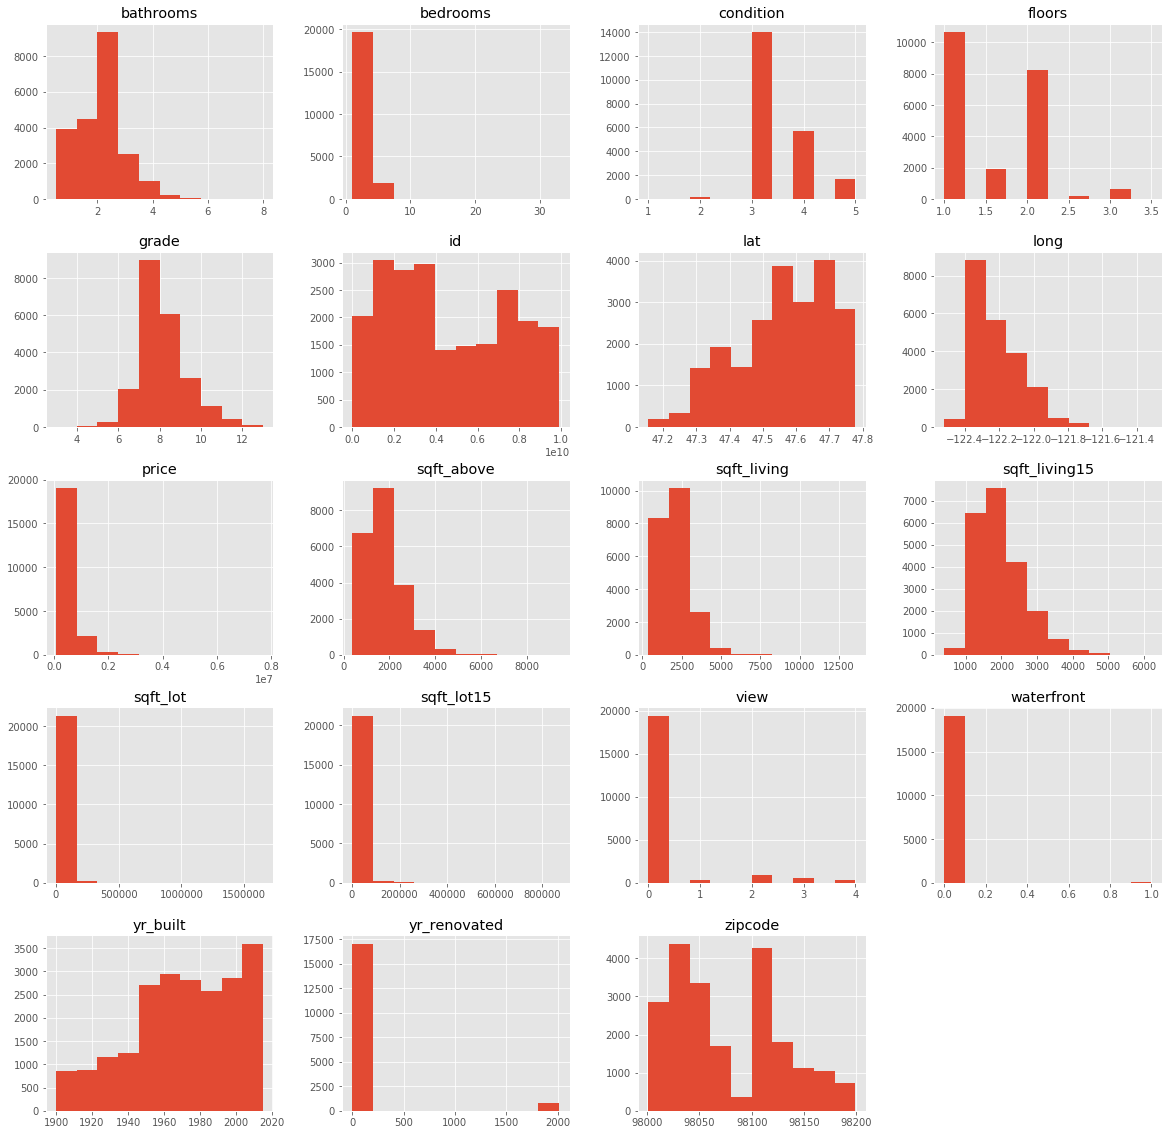

In [6]:
plt.style.use('ggplot')
df.hist(figsize = (20,20));

## TO CLEAN
Need to define catagories: view, waterfront, condition, floors...? 

yr_renovated needs to be dealt with as well. 

I have to check for empty cells as well as checking for incorrect data types.

______________________________________
I want to see how many houses show up twice in our data.

In [ ]:
sum(df.id.value_counts() <= 1), sum(df.id.value_counts() > 1)

There looks like there are 176 properties that were sold more than one and 21224 properites that only appeare on this list once. I am not sure that I can do anything with this.

In [ ]:
df.isna().sum()

In [ ]:
df.info()

Lets change sqft_basement data type


In [3]:
df.sqft_basement = df.sqft_basement.astype('float')

ValueError: could not convert string to float: '?'

It looks like there may be some placeholder in the data.

In [7]:
sum(df.sqft_basement == "?")

454

There are 454 '?' placeholders in the .sqft_basement . I will need to take care of them.

In [8]:
mask = df.sqft_basement == '?' #This sets ou condtional situation.
column_name = 'sqft_basement' #Not sure why I did this here if I could just do it in the next step.
df.loc[mask, column_name] = 0

In [9]:
df.loc[df.sqft_basement == '?', 'sqft_basement'] = 0 #Works the same way above.

In [10]:
df.sqft_basement = df.sqft_basement.astype('float64')

In [11]:
to_plot1 = df.loc[df.waterfront.isna()]
to_plot = to_plot1.loc[to_plot1.long >= -122.7]
to_plot.shape

(2376, 21)

In [12]:
agua = [8888000055,623039026, 573000685,1822039138, 6398000191,8550001515,5215200010, 6102400166, 7632400400]
to_plot.waterfront = np.where(to_plot.id.isin(agua), 1, 0)
df.fillna(to_plot, inplace=True)
df.waterfront.isna().sum() #seeing the number go down makes me feel better

0

In [13]:
import os
import folium
from folium.plugins import MarkerCluster

In [14]:
m = folium.Map(
    location = [to_plot.lat.mean(), to_plot.long.mean()],
)

marker_cluster = MarkerCluster(
    name = 'house_prices',
    overlay = True,
    control = False,
    icon_create_function = None
)

size = len(to_plot)
lats = list(to_plot.lat)
lons = list(to_plot.long)
ids = list(to_plot.id)

for k in range(size):
    location = lats[k], lons[k]
    marker = folium.Marker(location=location)
    popup = 'id:{}<br>lon:{}<br>lat:{}'.format(ids[k],location[1], location[0])
    folium.Popup(popup).add_to(marker)
    marker_cluster.add_child(marker)


marker_cluster.add_to(m)

folium.LayerControl().add_to(m)
m

In [ ]:
m = folium.Map(location=[47.54832,-122.229983], zoom_start=3)

m.choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=df,
    columns=['price'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
)


folium.LayerControl().add_to(m)

m

In [ ]:
#temp.apply(lambda row:folium.Marker(location=[row["lat"], row["long"]]).add_to(m),axis=1);

In [ ]:
#df.to_pickle("./cleaned_data")

In [8]:
df = pd.read_pickle('cleaned_data')
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3749
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
delta_lot           0
delta_living        0
dtype: int64

reno - built = time until first renovation. Then we can safely take away a subset of data leaving us with some remaining NAN values.

In [ ]:
plt.style.use('ggplot')

BUT FIRST, Lets check the how random the missing data is using a nifty library missingno: https://github.com/ResidentMario/missingno *Learn how to do hyperlinks in markup

In [23]:
import missingno as msno

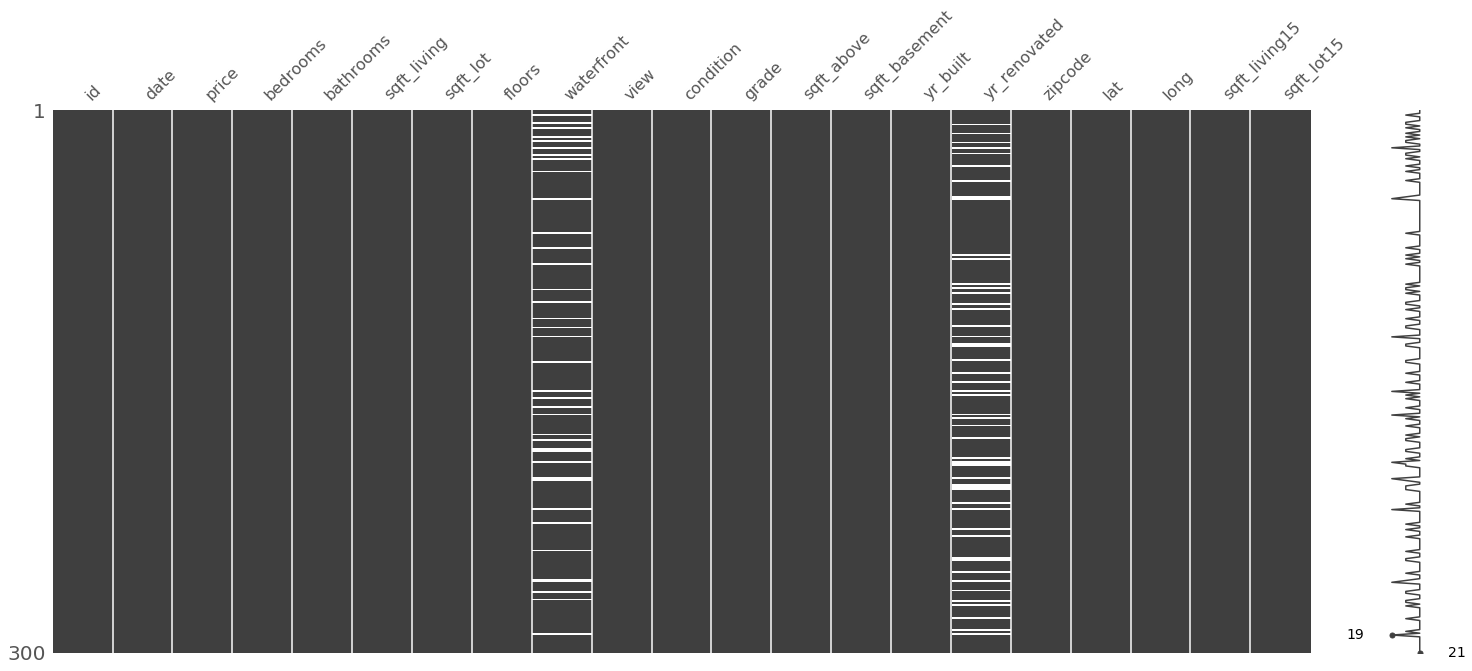

In [24]:
df = df.replace("nan", np.nan) #makes all the nan values into the pandas friendly version. 
msno.matrix(df.sample(300))

So this shows us a sample of our data set and where the data is missing. It looks fairly random.

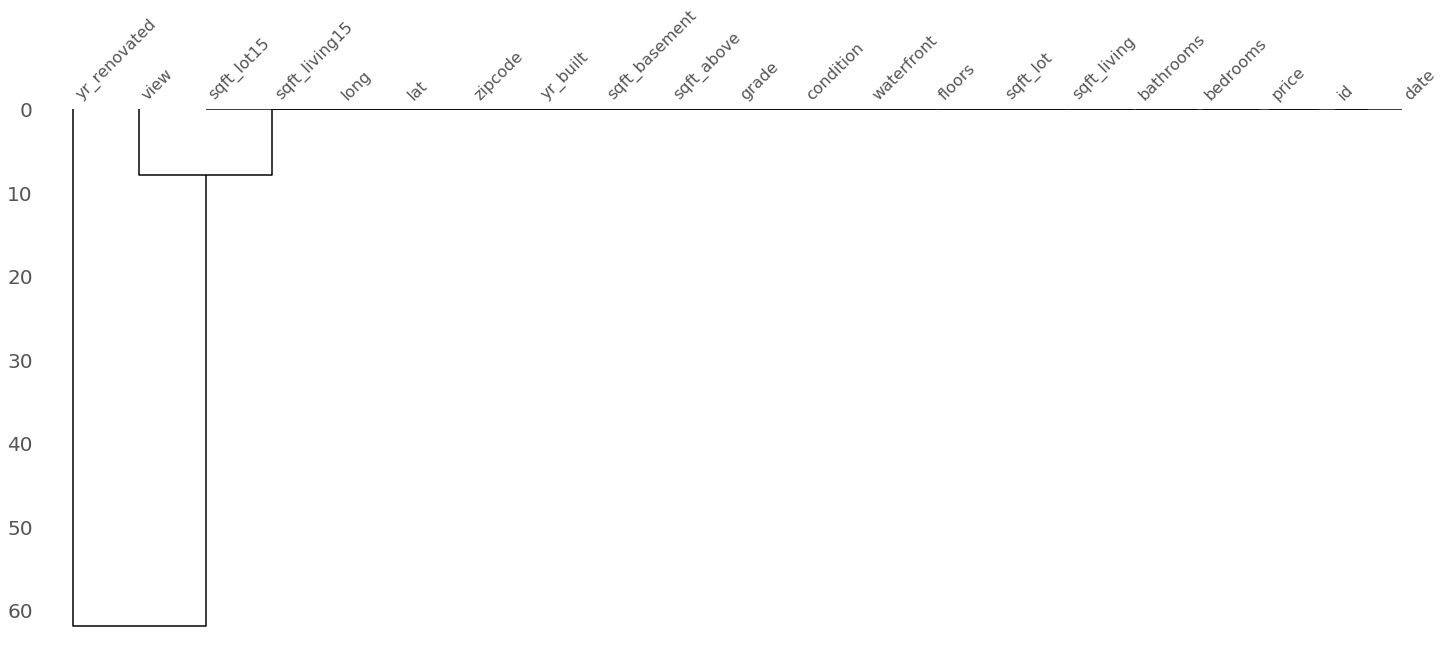

In [17]:
msno.dendrogram(df)

Viewing the dendrogram, we can see that the missing waterfront and yr_renovated do not correspond within their own missing data.

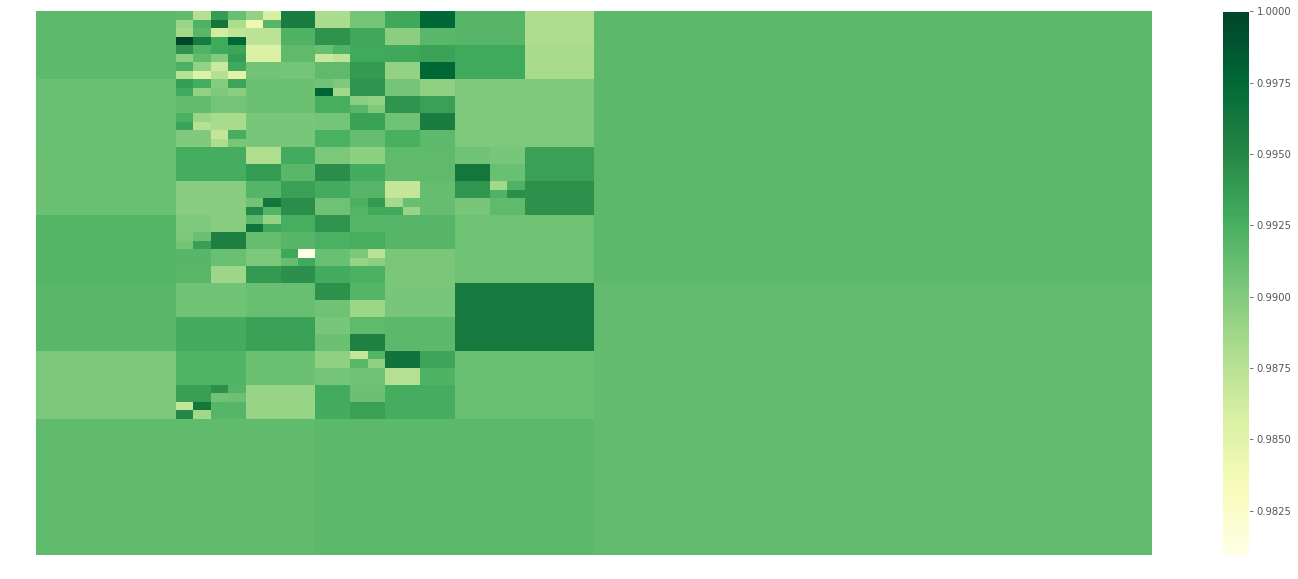

In [18]:
msno.geoplot(df, x='long', y='lat')

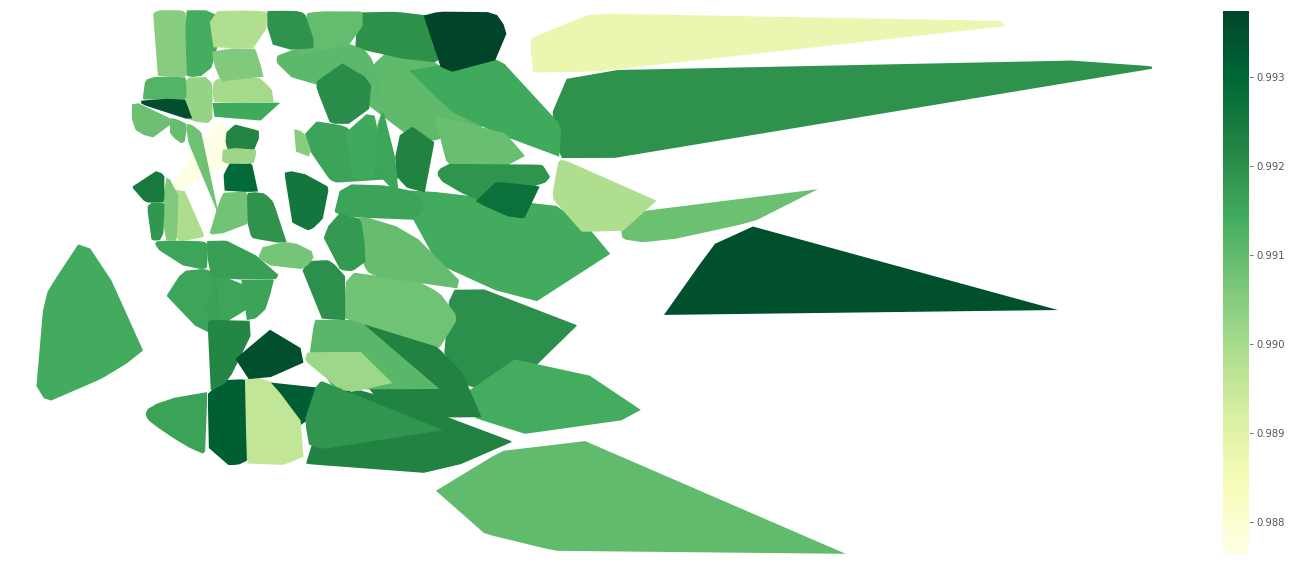

In [19]:
msno.geoplot(df, x='long', y='lat', by='zipcode')

So we are grouping this data into relative regions of lat and long, which allows up to check the geographic distribution of the missing data. The number of values left blank range by almost 10% and the distances look random enough (there is no disproption in the western rurals areas). **Look at an side by side comparison to the map**

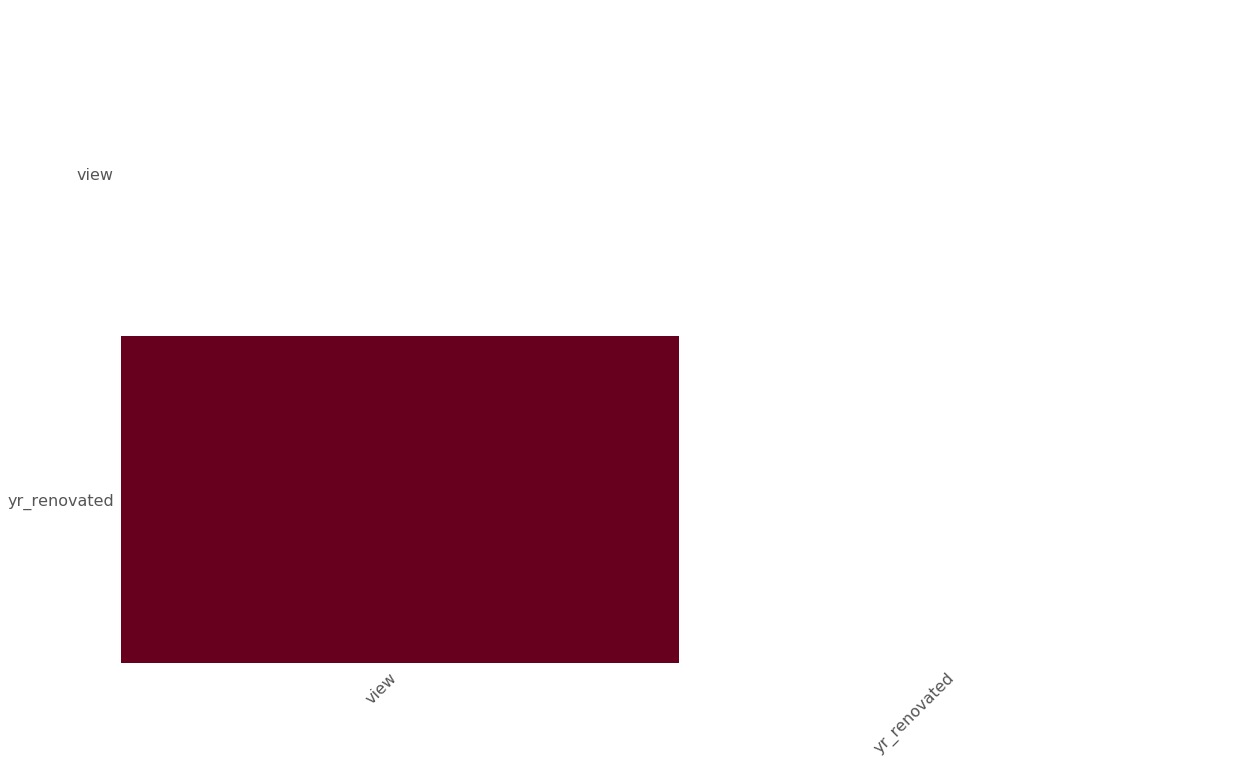

In [20]:
msno.heatmap(df)

## To FINALLY clean the yr_renovated data, lets use some statistical imputation

In [ ]:
renovate = df.loc[df.yr_renovated.isna()] #makes a new DataFrame with a containing the subset of all missing yr_renovated

renovate['delta_lot'] = np.where(renovate.sqft_lot != renovate.sqft_lot15, 1, 0) #making two new columns that will let us know if there were any changes in the sqft of house or lot
renovate['delta_living'] = np.where(renovate.sqft_living != renovate.sqft_living15, 1, 0) #delta_lot/delta_living: 1 = changed(True) 0= no change(False)
renovate.yr_renovated[(renovate.delta_living == 0) & (renovate.delta_lot == 0)] = 0 #Where there are no recorded changes, I am going to assume there have been no renovations

I have to fill some of these missing yr_renovated values. I need to split them up before I know how I deal with them. What is the average year, t ,from year built that a renovation (thinking it as "the first renovation") occurs. Yes there are going to be differences between the decades and spending values but we can assume there will be some market average buffer zone.

In [ ]:
df['1st_reno'] = df.yr_renovated - df.yr_built
#df = df[df['1st_reno'] > 0] #Here is taking all the negative values in my new column and setting them to zero by the fact pandas does boolean indexing there.

In [ ]:
df['1st_reno'].hist()
df['1st_reno'].describe()

This looks pretty normal to me. I can normalize these values to get the variables of a disrapution. I will then model randomly generated variables to replace the rest NaN values. Then we add that value to year built, should be model what they truly could be in the entire county. It will make pockets of high desnity neighborhoods impact rural districts though. It is imperfect.

In [ ]:
df['norm_1st_reno'] = (df['1st_reno'] - np.mean(df['1st_reno']) / np.sqrt(np.var(df['1st_reno'])))
df.info()

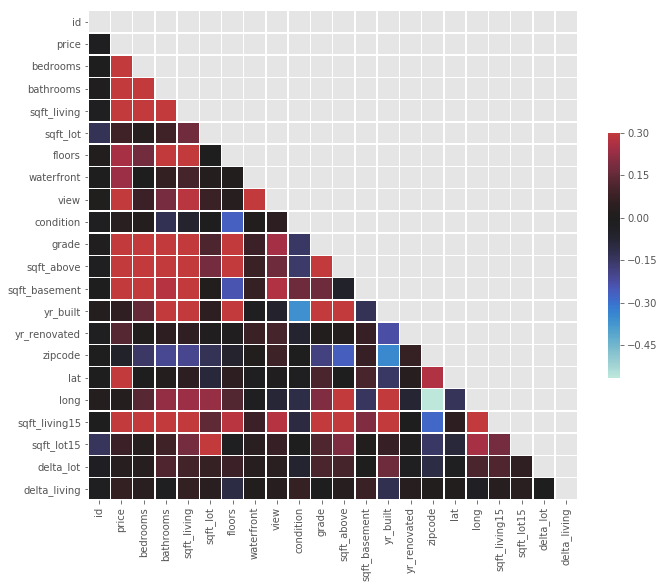

In [9]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
df_pred = df.drop(['id','price'], axis = 1)

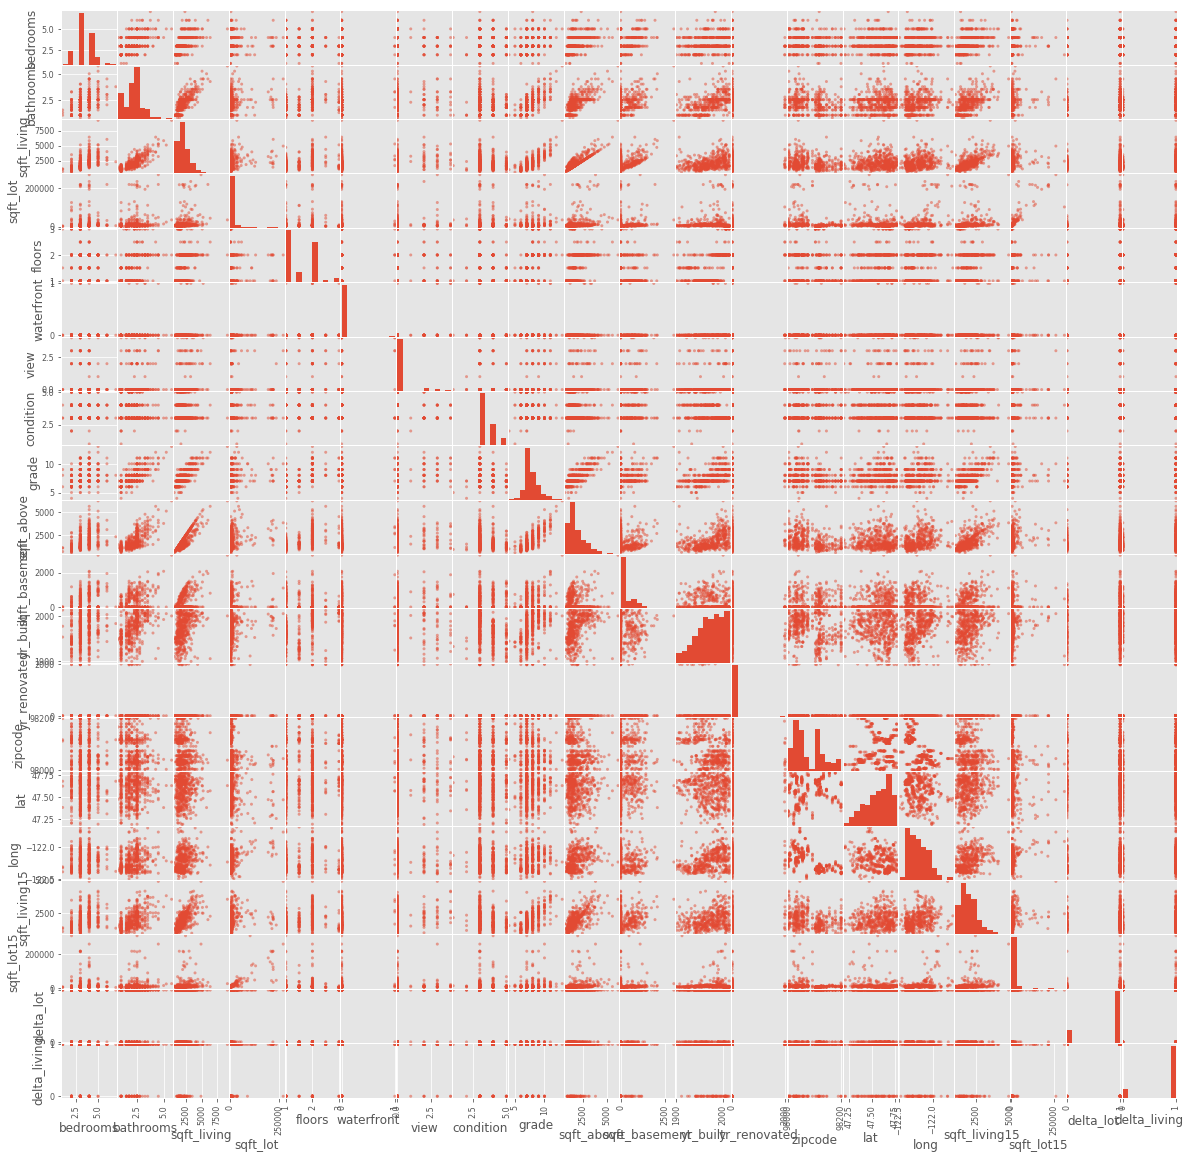

In [14]:
pd.plotting.scatter_matrix(df_pred.sample(500),figsize  = [20, 20]);

In [17]:
abs(df.corr()) > 0.75

id  price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id              True  False     False      False        False     False   
price          False   True     False      False        False     False   
bedrooms       False  False      True      False        False     False   
bathrooms      False  False     False       True         True     False   
sqft_living    False  False     False       True         True     False   
sqft_lot       False  False     False      False        False      True   
floors         False  False     False      False        False     False   
waterfront     False  False     False      False        False     False   
view           False  False     False      False        False     False   
condition      False  False     False      False        False     False   
grade          False  False     False      False         True     False   
sqft_above     False  False     False      False         True     False   
sqft_basement  False  False     False      False        False     False   
yr_built       False  False     False      False        False     False   
yr_renovated   False  False     False      False        False     False   
zipcode        False  False     False      False        False     False   
lat            False  False     False      False        False     False   
long           False  False     False      False        False     False   
sqft_living15  False  False     False      False         True     False   
sqft_lot15     False  False     False      False        False     False   
delta_lot      False  False     False      False        False     False   
delta_living   False  False     False      False        False     False   

               floors  waterfront   view  condition      ...       \
id              False       False  False      False      ...        
price           False       False  False      False      ...        
bedrooms        False       False  False      False      ...        
bathrooms       False       False  False      False      ...        
sqft_living     False       False  False      False      ...        
sqft_lot        False       False  False      False      ...        
floors           True       False  False      False      ...        
waterfront      False        True  False      False      ...        
view            False       False   True      False      ...        
condition       False       False  False       True      ...        
grade           False       False  False      False      ...        
sqft_above      False       False  False      False      ...        
sqft_basement   False       False  False      False      ...        
yr_built        False       False  False      False      ...        
yr_renovated    False       False  False      False      ...        
zipcode         False       False  False      False      ...        
lat             False       False  False      False      ...        
long            False       False  False      False      ...        
sqft_living15   False       False  False      False      ...        
sqft_lot15      False       False  False      False      ...        
delta_lot       False       False  False      False      ...        
delta_living    False       False  False      False      ...        

               sqft_basement  yr_built  yr_renovated  zipcode    lat   long  \
id                     False     False         False    False  False  False   
price                  False     False         False    False  False  False   
bedrooms               False     False         False    False  False  False   
bathrooms              False     False         False    False  False  False   
sqft_living            False     False         False    False  False  False   
sqft_lot               False     False         False    False  False  False   
floors                 False     False         False    False  False  False   
waterfront             False     False         False    False  False  Fa

In [2]:
import missingno as msno
df = pd.read_csv('Accident_Information.csv')

C:\Users\J\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<Figure size 648x216 with 0 Axes>

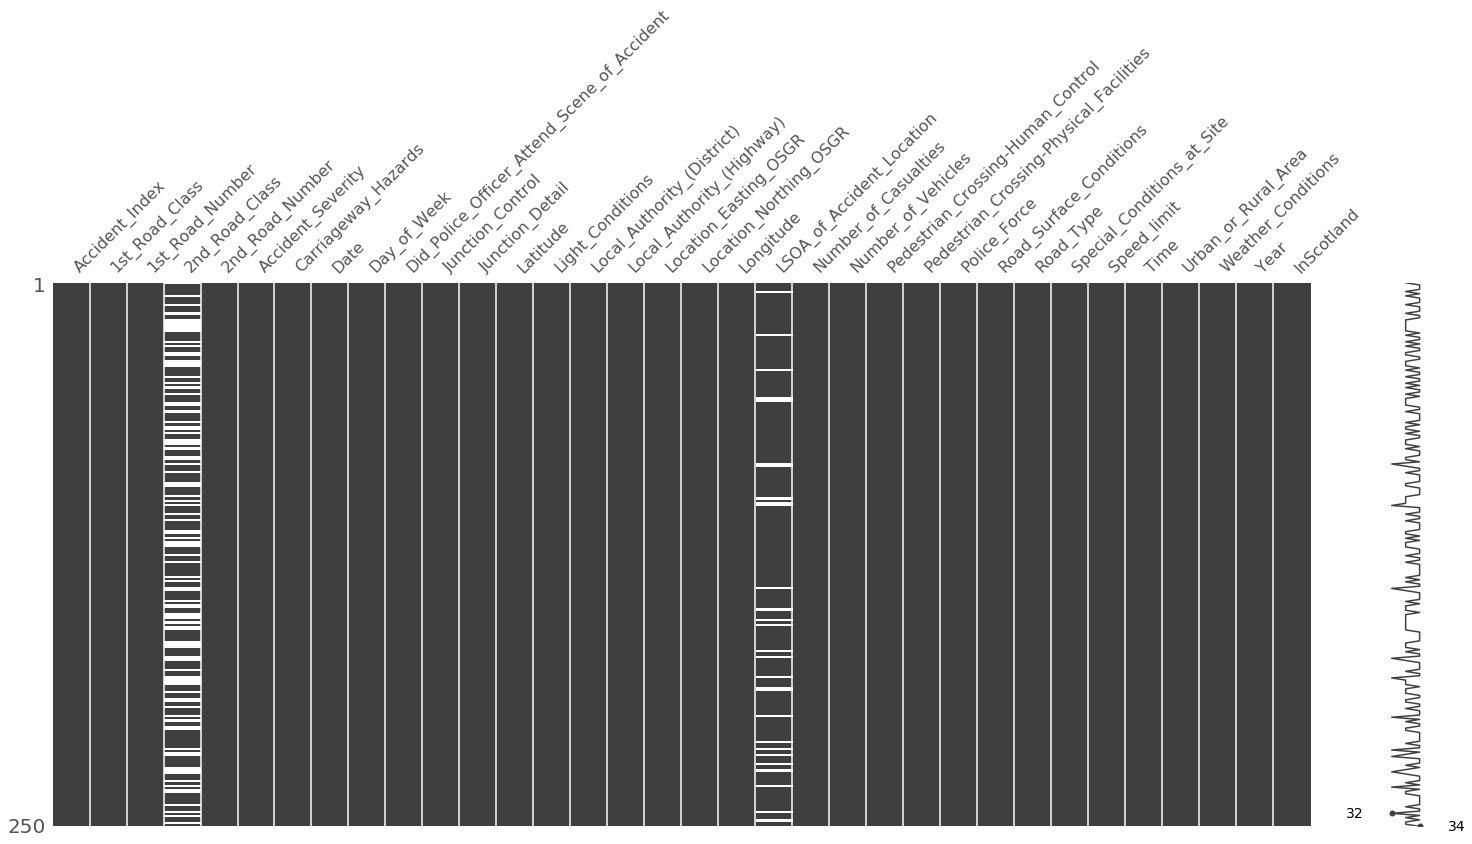

In [26]:
huh = plt.figure(1, figsize=(9, 3))
ok = msno.matrix(df.sample(250))

In [27]:
plt.savefig('ok')
plt.savefig('huh')

<Figure size 432x288 with 0 Axes>

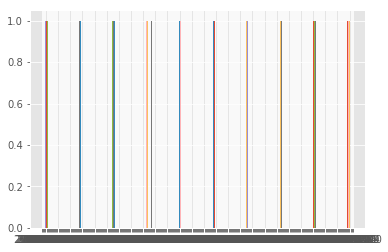

In [3]:
df2 = df.sample(300)

ok = df2.Date.hist()

In [4]:
plt.savefig('ok')

<Figure size 432x288 with 0 Axes>